In [1]:
from sklearn.preprocessing import MinMaxScaler
from pylab import pcolor, colorbar, plot
from minisom import MiniSom
import pandas as pd
import numpy as np

In [2]:
base = pd.read_csv('credit_data.csv')
base

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [3]:
base.dropna(inplace=True)
base.reset_index(drop=True, inplace=True)
base

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1992,1996,59221.044874,48.518179,1926.729397,0
1993,1997,69516.127573,23.162104,3503.176156,0
1994,1998,44311.449262,28.017167,5522.786693,1
1995,1999,43756.056605,63.971796,1622.722598,0


In [4]:
# a média dos valores maiores ou iguais a zero é 40.92770044906149
base['age'] = base['age'].apply(lambda x: x if x >= 0 else 40.92770044906149)
base.iloc[15:27]

,clientid,income,age,loan,default
15,16,50501.726689,40.927700,3977.287432,0
16,17,43548.654711,39.574530,3935.544453,0
17,18,43378.175194,60.848318,3277.737553,0
18,19,20542.365073,61.690571,3157.442290,0
19,20,58887.357549,26.076093,4965.516066,0
20,21,23000.784002,31.761354,1148.118057,0
21,22,32197.620701,40.927700,4244.057136,0
22,23,23329.319414,48.576975,222.622299,0
23,24,27845.800894,51.970624,4959.921226,0
24,25,65301.984029,48.840922,5465.267886,0


In [5]:
X = base[['clientid', 'income', 'age', 'loan']].values
X

array([[1.00000000e+00, 6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [2.00000000e+00, 3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [3.00000000e+00, 5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [1.99800000e+03, 4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [1.99900000e+03, 4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [2.00000000e+03, 6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [6]:
y = base['default'].values
y

array([0, 0, 0, ..., 1, 0, 0])

In [7]:
normalizador = MinMaxScaler(feature_range=(0,1))
X = normalizador.fit_transform(X)
X

array([[0.00000000e+00, 9.23175898e-01, 8.92091749e-01, 5.88837391e-01],
       [5.00250125e-04, 2.88121646e-01, 6.54707879e-01, 4.76826954e-01],
       [1.00050025e-03, 7.46334292e-01, 9.81188803e-01, 5.82620111e-01],
       ...,
       [9.98999500e-01, 4.86122016e-01, 2.16958067e-01, 4.01128949e-01],
       [9.99499750e-01, 4.75009983e-01, 1.00000000e+00, 1.17790295e-01],
       [1.00000000e+00, 9.88813673e-01, 8.29709134e-01, 5.35970280e-01]])

In [8]:
som = MiniSom(
    x=15,
    y=15,
    input_len=4,
    random_seed=0
)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=2000, verbose=2)

 [ 2000 / 2000 ] 100% - 0:00:00 left 


 quantization error: 0.12647675092980842


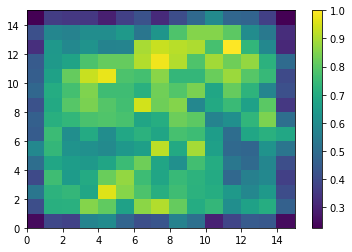

In [9]:
pcolor(som.distance_map().T)
colorbar()

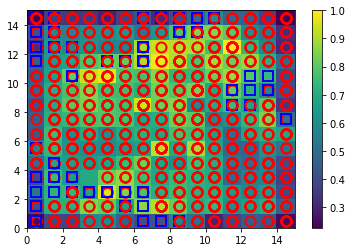

In [10]:
markers = ['o', 's']
colors = ['r', 'b']

pcolor(som.distance_map().T)
colorbar()
for i, x in enumerate(X):
    w = som.winner(x)
    plot(
        w[0] + 0.5,
        w[1] + 0.5,
        markers[y[i]],
        markerfacecolor='None',
        markersize=10,
        markeredgecolor=colors[y[i]],
        markeredgewidth=2
    )

In [11]:
mapeamento = som.win_map(X)
mapeamento

defaultdict(list,
            {(9, 9): [array([0.        , 0.9231759 , 0.89209175, 0.58883739]),
              array([0.0010005 , 0.74633429, 0.9811888 , 0.58262011]),
              array([0.00550275, 0.78874378, 0.92377791, 0.6722184 ]),
              array([0.01450725, 0.7768602 , 0.79395585, 0.78968884]),
              array([0.03851926, 0.70932   , 0.84492615, 0.67023198]),
              array([0.04502251, 0.88555995, 0.94488088, 0.54622831]),
              array([0.07503752, 0.99168174, 0.86463389, 0.78947487]),
              array([0.08554277, 0.80955934, 0.92225712, 0.77810223]),
              array([0.10005003, 0.69236954, 0.74851422, 0.7830839 ]),
              array([0.10305153, 0.92719604, 0.94670889, 0.77910362]),
              array([0.11705853, 0.78159345, 0.88384455, 0.75008768]),
              array([0.13706853, 0.75125057, 0.83946487, 0.61806462]),
              array([0.14157079, 0.69946237, 0.95671299, 0.64809543]),
              array([0.14607304, 0.95582021, 0.7689

In [12]:
suspeitos = np.concatenate((mapeamento[(13,9)], mapeamento[(1, 10)]), axis=0)
suspeitos

array([[0.35367684, 0.84941823, 0.13523793, 0.52926593],
       [0.38169085, 0.90338941, 0.16554127, 0.64351034],
       [0.44022011, 0.95467812, 0.17962909, 0.64514468],
       [0.44272136, 0.98939724, 0.05510083, 0.57991406],
       [0.47373687, 0.89971166, 0.20116432, 0.66172268],
       [0.60130065, 0.92022423, 0.02988542, 0.66752283],
       [0.62131066, 0.83602531, 0.25286292, 0.66418096],
       [0.03151576, 0.25435988, 0.3575979 , 0.07893698],
       [0.10605303, 0.2329924 , 0.30213393, 0.06227055],
       [0.16008004, 0.32247997, 0.35366445, 0.0071249 ],
       [0.20910455, 0.28646425, 0.40173226, 0.08894817],
       [0.21310655, 0.34588196, 0.36936996, 0.17180187],
       [0.25162581, 0.31756418, 0.36181158, 0.06119807]])

In [13]:
suspeitos = normalizador.inverse_transform(suspeitos)
suspeitos

array([[7.08000000e+02, 6.24694284e+04, 2.42648554e+01, 7.28655039e+03],
       [7.64000000e+02, 6.51669729e+04, 2.56562819e+01, 8.85908747e+03],
       [8.81000000e+02, 6.77304437e+04, 2.63031470e+01, 8.88158364e+03],
       [8.86000000e+02, 6.94657470e+04, 2.05852317e+01, 7.98370537e+03],
       [9.48000000e+02, 6.49831542e+04, 2.72919716e+01, 9.10977434e+03],
       [1.20300000e+03, 6.60083971e+04, 1.94274258e+01, 9.18961151e+03],
       [1.24300000e+03, 6.18000344e+04, 2.96657960e+01, 9.14361171e+03],
       [6.40000000e+01, 3.27277007e+04, 3.44748710e+01, 1.08791936e+03],
       [2.13000000e+02, 3.16597282e+04, 3.19281537e+01, 8.58511388e+02],
       [3.21000000e+02, 3.61324239e+04, 3.42942604e+01, 9.94495914e+01],
       [4.19000000e+02, 3.43323153e+04, 3.65013709e+01, 1.22572022e+03],
       [4.27000000e+02, 3.73020834e+04, 3.50154039e+01, 2.36617424e+03],
       [5.04000000e+02, 3.58867268e+04, 3.46683488e+01, 8.43749092e+02]])

In [14]:
classe = []

for i in range(len(base)):
    for j in range(len(suspeitos)):
        if base['clientid'].iloc[i] == int(round(suspeitos[j,0])):
            classe.append(base.iloc[i,4])
classe = np.asarray(classe)
classe

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1])

In [16]:
suspeitos_final = np.column_stack((suspeitos, classe))
suspeitos_final = suspeitos_final[suspeitos_final[:, 4].argsort()]
suspeitos_final

array([[7.08000000e+02, 6.24694284e+04, 2.42648554e+01, 7.28655039e+03,
        0.00000000e+00],
       [7.64000000e+02, 6.51669729e+04, 2.56562819e+01, 8.85908747e+03,
        0.00000000e+00],
       [8.81000000e+02, 6.77304437e+04, 2.63031470e+01, 8.88158364e+03,
        0.00000000e+00],
       [8.86000000e+02, 6.94657470e+04, 2.05852317e+01, 7.98370537e+03,
        0.00000000e+00],
       [9.48000000e+02, 6.49831542e+04, 2.72919716e+01, 9.10977434e+03,
        0.00000000e+00],
       [1.20300000e+03, 6.60083971e+04, 1.94274258e+01, 9.18961151e+03,
        0.00000000e+00],
       [1.24300000e+03, 6.18000344e+04, 2.96657960e+01, 9.14361171e+03,
        0.00000000e+00],
       [3.21000000e+02, 3.61324239e+04, 3.42942604e+01, 9.94495914e+01,
        0.00000000e+00],
       [6.40000000e+01, 3.27277007e+04, 3.44748710e+01, 1.08791936e+03,
        1.00000000e+00],
       [2.13000000e+02, 3.16597282e+04, 3.19281537e+01, 8.58511388e+02,
        1.00000000e+00],
       [4.19000000e+02, 3.4332